In [20]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [21]:
!pip install mlxtend

In [22]:
import pandas as pd

df = pd.read_csv('/content/Customer Preference Survey (Responses) - Form Responses 1.csv')

In [23]:
df.head(5)

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [24]:
df.drop([0]).head()

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
5,10/17/2021 17:43:55,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ


In [25]:
missing = df.isnull().sum()
print(missing)

Timestamp                        0
playstation5                     1
เครื่องทำขนมปัง                  1
Ergonomic Wrist Rest             1
เครื่องอบผ้า                     1
เครื่องชงกาแฟแคปซูล              1
เก้าอี้ LA-Z-Boy                 1
เครื่องให้อาหารสัตว์อัตโนมัติ    1
บัตตาเลี่ยน                      2
แก้วเก็บความเย็น                 1
ลู่วิ่งออกกำลังกาย               1
Kindle                           1
เครื่องซักผ้า                    1
Bluetooth Speaker                1
ห้องน้ำแมวอัตโนมัติ              1
PS5                              1
ทรายแมว                          1
ลำโพง pixel                      1
Logitech Mx Master 3 Mouse       1
ตุ๊กตา ty                        1
น้ำพุแมว                         1
Robot ดูดฝุ่น                    1
Mechanical keyboard              2
Nintendo switch                  2
หนังสือ python                   1
gaming chair                     2
Deskmat                          1
Dew - ไฟโรเซ่                    1
เทียนหอม jo malone  

In [26]:
df.dropna(inplace=True)

In [27]:
df.drop(['Timestamp'],axis = 1,inplace=True)

In [28]:
column_val = df[df.columns].values.ravel()
unique_val = pd.unique(column_val)
unique_val

array(['ไม่เคยซื้อ', 'ไม่เคย', 'เคยซื้อ', 'ไม่', 'ไม่เคยซือ', 'เคย'],
      dtype=object)

In [29]:
df.replace(['เคยซื้อ', 'เคย'],1,inplace=True)
df.replace(['ไม่เคยซื้อ', 'ไม่เคย', 'ไม่', 'ไม่เคยซือ'],0,inplace=True)

In [30]:
df.head(10)

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
3,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
5,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
13,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0
14,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [31]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

In [32]:
frequent_itemsets

,support,itemsets
0,0.750,(แก้วเก็บความเย็น)
1,0.525,(เครื่องซักผ้า)
2,0.700,(Bluetooth Speaker)
3,0.525,(Mechanical keyboard)
4,0.550,(หนังสือ python)
5,0.550,(พลาสเตอร์บรรเทาปวด ตราเสือ)
6,0.600,(ขนมจีนน้ำยาปู)
7,0.825,(Salmon Sashimi)
8,0.800,(External Harddisk)
9,0.600,(หม้อทอดไร้น้ํามัน)


In [33]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bluetooth Speaker),(แก้วเก็บความเย็น),0.700,0.750,0.525,0.750000,1.000000,1.110223e-16,1.000000
1,(แก้วเก็บความเย็น),(Bluetooth Speaker),0.750,0.700,0.525,0.700000,1.000000,1.110223e-16,1.000000
2,(หม้อทอดไร้น้ํามัน),(แก้วเก็บความเย็น),0.600,0.750,0.525,0.875000,1.166667,7.500000e-02,2.000000
3,(แก้วเก็บความเย็น),(หม้อทอดไร้น้ํามัน),0.750,0.600,0.525,0.700000,1.166667,7.500000e-02,1.333333
4,(แก้วเก็บความเย็น),(ยาดม),0.750,0.825,0.625,0.833333,1.010101,6.250000e-03,1.050000
5,(ยาดม),(แก้วเก็บความเย็น),0.825,0.750,0.625,0.757576,1.010101,6.250000e-03,1.031250
6,(Bluetooth Speaker),(External Harddisk),0.700,0.800,0.575,0.821429,1.026786,1.500000e-02,1.120000
7,(External Harddisk),(Bluetooth Speaker),0.800,0.700,0.575,0.718750,1.026786,1.500000e-02,1.066667
8,(Bluetooth Speaker),(ยาดม),0.700,0.825,0.625,0.892857,1.082251,4.750000e-02,1.633333
9,(ยาดม),(Bluetooth Speaker),0.825,0.700,0.625,0.757576,1.082251,4.750000e-02,1.237500


In [34]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]
rules.sort_values(['support'], ascending = False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Salmon Sashimi),(ยาดม),0.825,0.825,0.725,0.878788,1.065197,0.044375,1.443750
18,(ยาดม),(Salmon Sashimi),0.825,0.825,0.725,0.878788,1.065197,0.044375,1.443750
5,(ยาดม),(แก้วเก็บความเย็น),0.825,0.750,0.625,0.757576,1.010101,0.006250,1.031250
9,(ยาดม),(Bluetooth Speaker),0.825,0.700,0.625,0.757576,1.082251,0.047500,1.237500
8,(Bluetooth Speaker),(ยาดม),0.700,0.825,0.625,0.892857,1.082251,0.047500,1.633333
4,(แก้วเก็บความเย็น),(ยาดม),0.750,0.825,0.625,0.833333,1.010101,0.006250,1.050000
6,(Bluetooth Speaker),(External Harddisk),0.700,0.800,0.575,0.821429,1.026786,0.015000,1.120000
7,(External Harddisk),(Bluetooth Speaker),0.800,0.700,0.575,0.718750,1.026786,0.015000,1.066667
45,"(External Harddisk, Salmon Sashimi)",(ยาดม),0.650,0.825,0.575,0.884615,1.072261,0.038750,1.516667
46,(ยาดม),"(External Harddisk, Salmon Sashimi)",0.825,0.650,0.575,0.696970,1.072261,0.038750,1.155000


# **Comment**

สรุป ได้ลองปรับค่าต่างๆโดยเลือก Support >= 0.5 

และกำหนด Rules ['lift'] >= 1 & ['confidence'] >= 0.5 

เลือก Top15 by Support Value จะเห็นว่า คู่ Product (Salmon Sashimi) &	(ยาดม) มีค่า Support สูงที่สุดเลย 0.725 

Support 0.725 (ใน 100 transaction (Salmon Sashimi) &	(ยาดม) เกิดพร้อมกัน 72.5 ครั้ง) 

Confident ความมั่นใจ 0.878788 (87.87%)

Lift 1.065197 (ค่ายิ่งมากโอกาสเจอยิ่งน้อย rare)

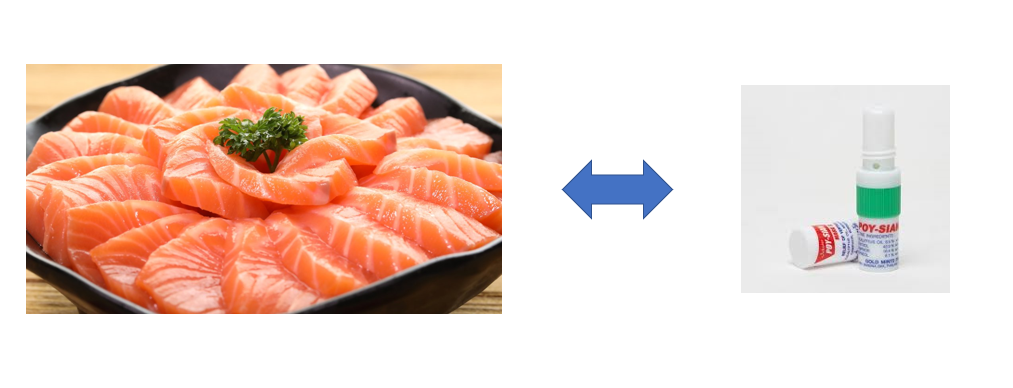